In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/wounds'


In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  
  
folder = '/content/drive/MyDrive/wounds'

onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")

Working with 0 images
Image examples: 


Working with 1387 images
Image examples: 
img1140.jpg


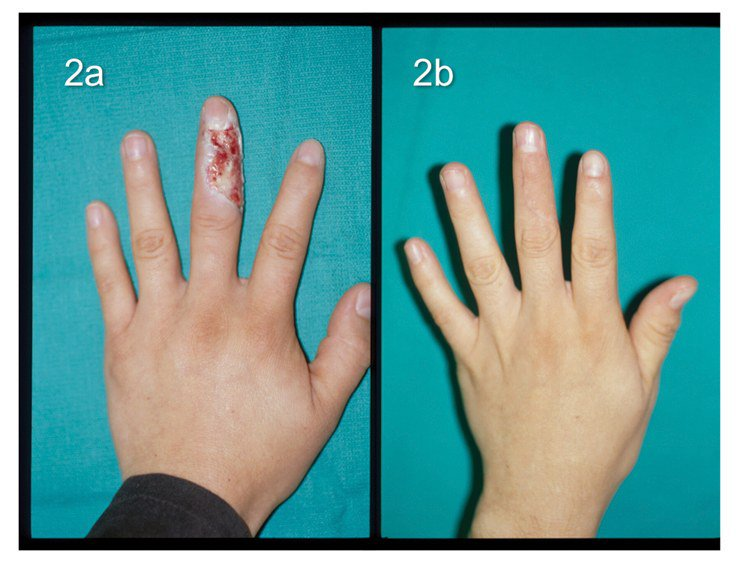

img114.jpg


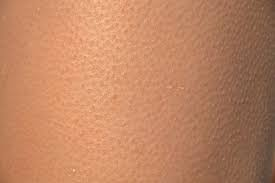

img1134.jpg


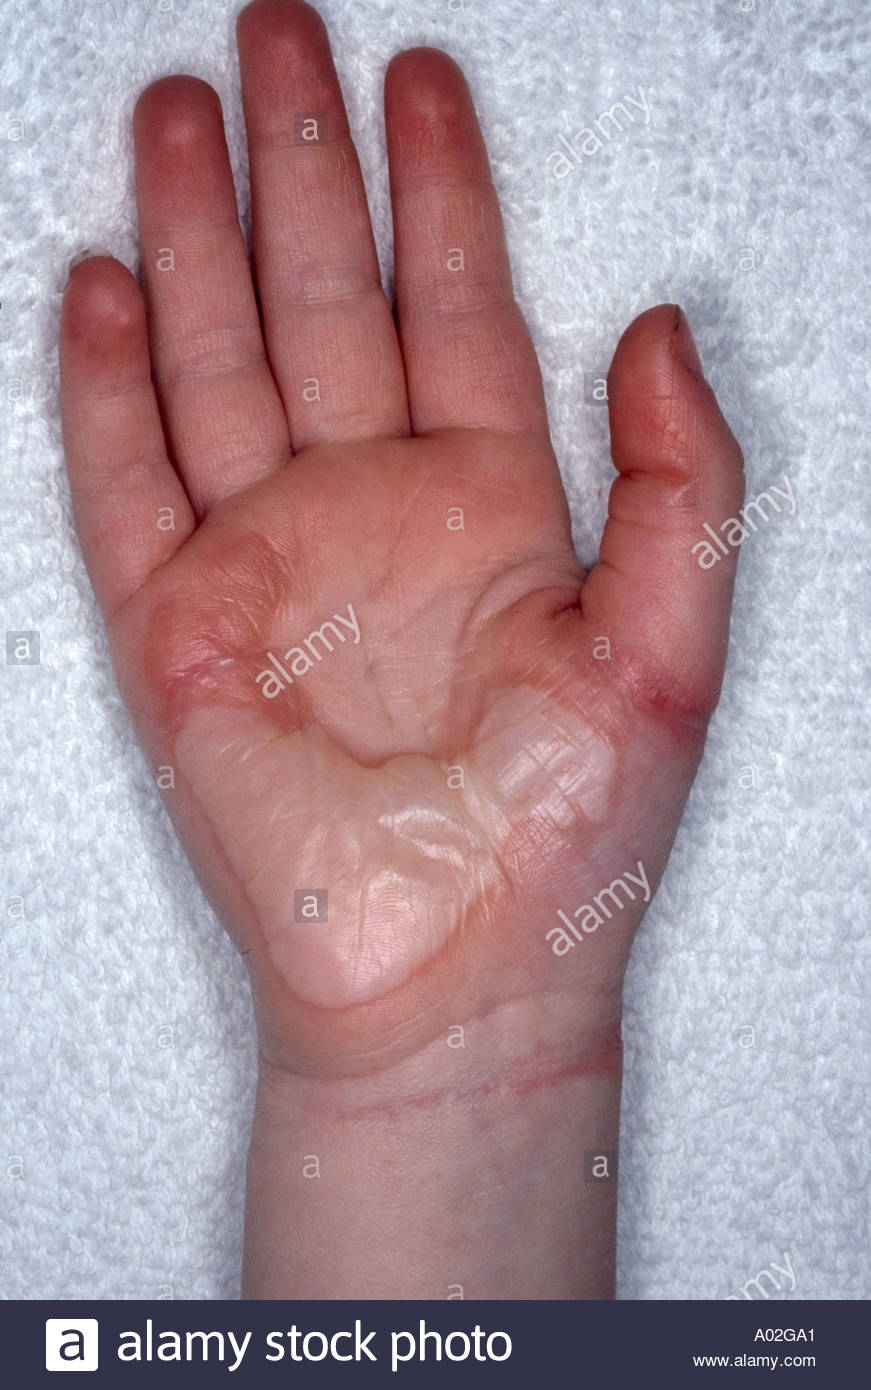

img1137.jpg


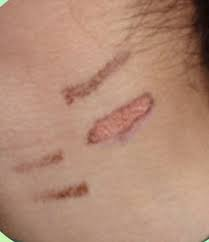

img1145.jpg


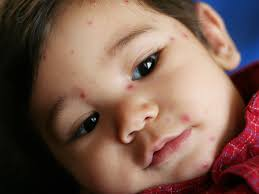

img1154.jpg


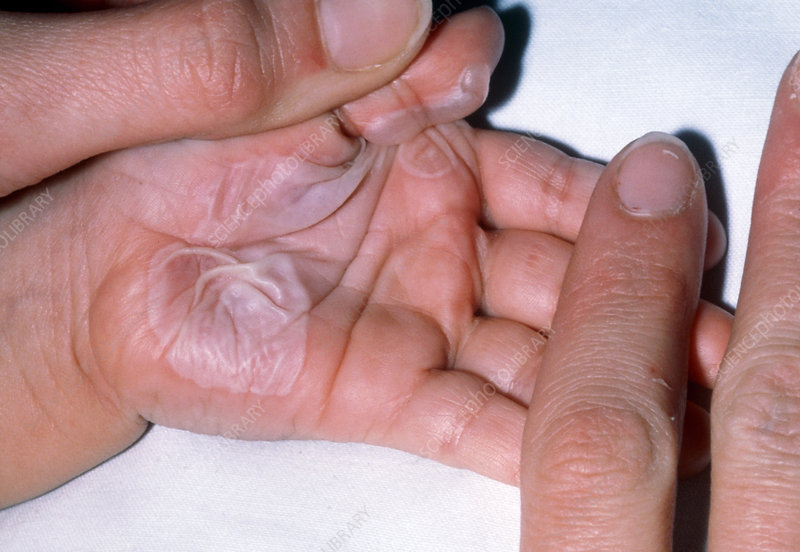

img1149.jpg


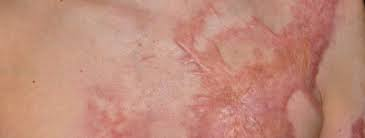

img1152.jpg


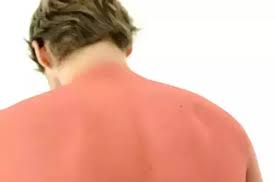

img115.jpg


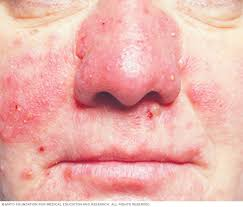

img1172.jpg


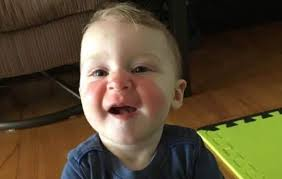

In [ ]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder ="/content/drive/MyDrive/wounds/acute wounds"


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/wounds')
print(len(folders))

1


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers


adam = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3221 images belonging to 2 classes.


In [ ]:


model_history=model.fit_generator(
  train_set,
  epochs=10,
  steps_per_epoch=5,
  verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
5/5 - 15s - loss: 352.4277 - accuracy: 0.5000 - 15s/epoch - 3s/step
Epoch 2/10
5/5 - 13s - loss: 305.2899 - accuracy: 0.5000 - 13s/epoch - 3s/step
Epoch 3/10
5/5 - 13s - loss: 320.6503 - accuracy: 0.5000 - 13s/epoch - 3s/step
Epoch 4/10
5/5 - 11s - loss: 385.0718 - accuracy: 0.5000 - 11s/epoch - 2s/step
Epoch 5/10
5/5 - 14s - loss: 317.2642 - accuracy: 0.5000 - 14s/epoch - 3s/step
Epoch 6/10
5/5 - 11s - loss: 344.2087 - accuracy: 0.5000 - 11s/epoch - 2s/step
Epoch 7/10
5/5 - 8s - loss: 364.4684 - accuracy: 0.5000 - 8s/epoch - 2s/step
Epoch 8/10
5/5 - 11s - loss: 333.0248 - accuracy: 0.5000 - 11s/epoch - 2s/step
Epoch 9/10
5/5 - 8s - loss: 431.3576 - accuracy: 0.5000 - 8s/epoch - 2s/step
Epoch 10/10
5/5 - 8s - loss: 359.8277 - accuracy: 0.5000 - 8s/epoch - 2s/step
Training completed in time:  0:08:20.196956
